In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle

import sys
sys.path.append("..")
from settings import AMBIGUITY_PATH, EMBEDDINGS_PATH, AMBIGUITY_VARIATION
from src.analysis.embedded import calculate_vocabulary_variation, embedded_CIs
from src.data.utils import parallelize_dataframe

sns.set(rc={'figure.figsize':(15, 7)}, font_scale=1.3)
sns.set_style("white", {'axes.grid' : False})

In [2]:
variations = pd.read_csv(AMBIGUITY_VARIATION)
variations.CIs = variations.CIs.apply(eval)

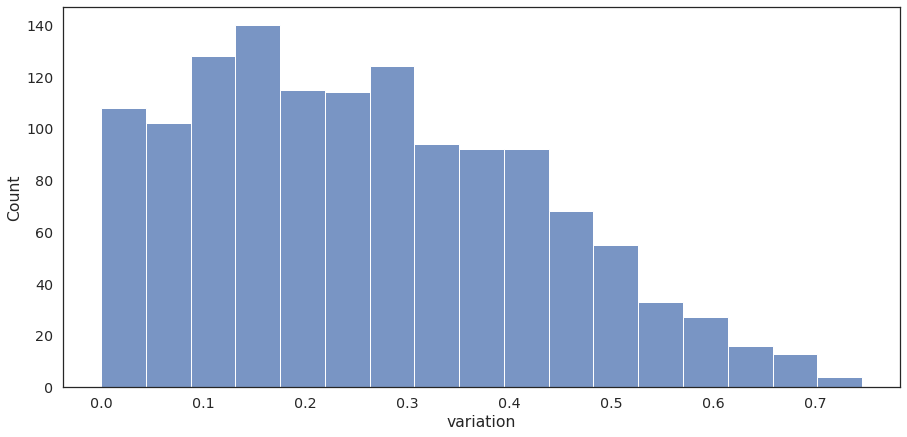

In [3]:
sns.histplot(data=variations.variation);

In [4]:
variations.describe()

,variation
count,1325.000000
mean,0.263352
std,0.164738
min,0.000000
25%,0.129710
50%,0.248651
75%,0.383876
max,0.745275


In [5]:
median_mask = variations.variation.sub(variations.variation.median()).abs().lt(0.001)
median_indices = median_mask[median_mask == True].index
print("Median emojis:")
print(variations.iloc[median_indices].emoji)

Median emojis:
454      🐊
590    👨‍🦽
625    👩‍🦲
763      📰
817      🔧
947      😹
Name: emoji, dtype: object


In [6]:
mean_mask = variations.variation.sub(variations.variation.mean()).abs().lt(0.001)
mean_indices = mean_mask[mean_mask == True].index
print("Mean emojis:")
print(variations.iloc[mean_indices].emoji)

Mean emojis:
83          ♾️
314          🍳
408         🏘️
586        👨‍🦱
596     👩‍❤️‍👩
892          😂
898          😈
1084         🤓
Name: emoji, dtype: object


## Check faces and gestures

In [7]:
faces_gestures = ["✊","✋","👆","👇","👈","👉","👊","👋","👌","👍","👎","👏","👐",
                 "😀", "😁", "😂", "😃", "😄","😅", "😆", "😇", "😈", "😉", "😊", "😋",
                 "😌","😍","😎","😏","😐","😑","😒","😓","😔","😕","😖","😗","😘","😙",
                 "😚","😛","😜","😝","😞","😟","😠","😡","😢","😣","😤","😥","😦","😧",
                 "😨","😩","😪","😫","😬","😭","😮","😯","😰","😱","😲","😳","😴","😵",
                 "😶","😷","😸","😹","😺","😻","😼","😽","😾","😿","🙀","🙁","🙂","🙃",
                 "🙄", "🙌", "🙏", "🤐","🤑","🤒","🤓","🤔","🤕","🤗","🤘","🤙","🤚",
                 "🤛","🤜","🤝","🤞","🤟","🤢","🤣","🤤","🤥","🤦","🤧","🤨","🤩","🤪",
                 "🤫","🤬","🤭","🤮","🤯","🤲","🥰","🥱","🥳","🥴","🥵","🥶","🥺","🧐",
                 "🤝‍","☹️","☺️","✊","✋","✌️", "🖐️","🖕","🖖", "🤐","🤑","🤒","🤓",
                 "🤔","🤕","🤗","🤘","🤙","🤚","🤛","🤜","🤝","🤞","🤟","🤠", '☹', '👿']

In [8]:
variations[variations.emoji.isin(faces_gestures)].sort_values("variation")[:10]

,emoji,vocabulary,variation,CIs
922,😠,"Counter({'angry': 23, 'mad': 1, 'unhappy': 1})",0.035486,"[0.0, 0.09324674129486084]"
949,😻,"Counter({'love': 25, 'inlove': 2, 'happy': 1, ...",0.080351,"[0.02447982341051102, 0.1508794392645359]"
129,✌️,"Counter({'peace': 25, 'TRUE': 1, 'relax': 1, '...",0.084923,"[0.02820313771565755, 0.15896132849156858]"
948,😺,"Counter({'cat': 24, 'happy': 2, 'chat': 1, 'ca...",0.095881,"[0.02230100076774071, 0.18138765803185003]"
1175,🥰,"Counter({'love': 19, 'happy': 2, 'loving': 1, ...",0.106312,"[0.04566994541221195, 0.17655334395390965]"
920,😞,"Counter({'sad': 23, 'tired': 3, 'frown': 1, 'd...",0.111193,"[0.037554232279459636, 0.19903217535465953]"
522,👌,"Counter({'ok': 12, 'okay': 12, 'super': 3, 'go...",0.127271,"[0.0659961565301336, 0.18798309777831207]"
525,👏,"Counter({'clap': 23, 'applause': 3, 'applaud':...",0.133750,"[0.04988404015700022, 0.22741053963700922]"
914,😘,"Counter({'kiss': 18, 'love': 4, 'kisses': 3, '...",0.145350,"[0.07644541099153716, 0.2251616644191331]"
517,👇,"Counter({'down': 20, 'finger': 2, 'pointer': 1...",0.146820,"[0.06350045907976372, 0.24162821724478686]"


In [9]:
variations[variations.emoji.isin(faces_gestures)].sort_values("variation", ascending=False)[:10]

,emoji,vocabulary,variation,CIs
1260,🧐,"Counter({'monocle': 6, 'searching': 2, 'curiou...",0.694345,"[0.5435997547381076, 0.7627329219293235]"
523,👍,"Counter({'thumbsup': 8, 'good': 6, 'like': 4, ...",0.655073,"[0.38782256208360194, 0.712130584390834]"
934,😬,"Counter({'yikes': 4, 'scared': 3, 'smile': 2, ...",0.606156,"[0.423053946060439, 0.7507692504425845]"
524,👎,"Counter({'no': 6, 'thumbsdown': 5, 'bad': 5, '...",0.603726,"[0.4143850159332423, 0.8223876923793536]"
912,😖,"Counter({'sour': 4, 'angry': 3, 'pain': 2, 'di...",0.599204,"[0.4077970568377238, 0.6612847234050816]"
863,🖖,"Counter({'vulcan': 8, 'hand': 4, 'peace': 4, '...",0.595715,"[0.44189021012521, 0.6746707146858862]"
906,😐,"Counter({'neutral': 8, 'meh': 4, 'sad': 3, 'fr...",0.570245,"[0.43055628772825005, 0.6584948569039503]"
1096,🤟,"Counter({'love': 4, 'hand': 2, 'rockon': 2, 'l...",0.556742,"[0.43575327717779394, 0.842666649424214]"
944,😶,"Counter({'silent': 4, 'speechless': 3, 'surpri...",0.540968,"[0.41339387579892684, 0.7092315663064186]"
1106,🤩,"Counter({'starstruck': 10, 'happy': 2, 'smile'...",0.528141,"[0.38398891305872085, 0.659946779354379]"


In [10]:
variations[variations.emoji.isin(faces_gestures)].describe()

,variation
count,130.000000
mean,0.322696
std,0.133341
min,0.035486
25%,0.226780
50%,0.319662
75%,0.401400
max,0.694345


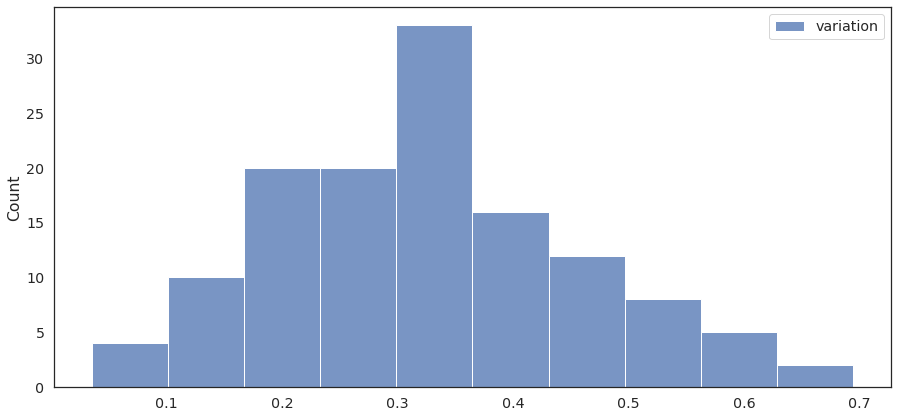

In [11]:
sns.histplot(data=variations[variations.emoji.isin(faces_gestures)], bins='doane');

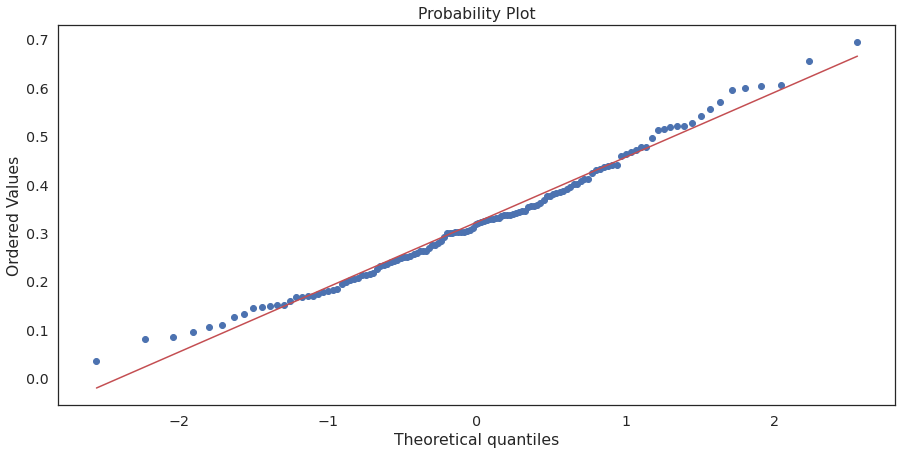

In [12]:
measurements = np.random.normal(loc=20, scale=5, size=100)   
stats.probplot(variations[variations.emoji.isin(faces_gestures)].variation, dist="norm", plot=plt);

## Check variation vs mean duration

In [13]:
emojis = pd.read_csv(AMBIGUITY_PATH)

In [14]:
variations = variations.set_index("emoji")
variations["mean_duration"] = emojis.groupby("emoji").Duration.sum() / emojis.groupby("emoji").WorkerID.count()

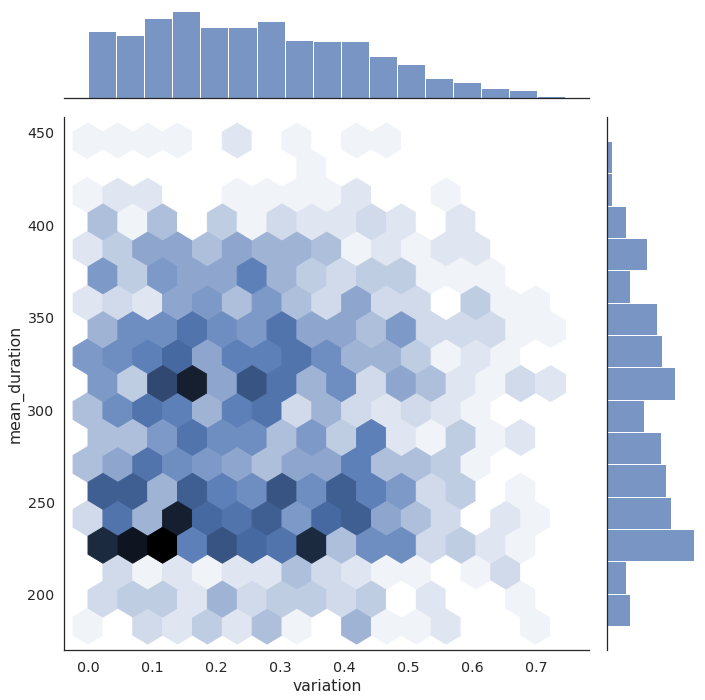

In [15]:
sns.jointplot(data=variations, x='variation', y='mean_duration', kind='hex', height=10);